In [42]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error



#%%

data_size=100

perch_length=np.random.randint(80,440,(1,data_size))/10 #(1,100)

perch_weight=perch_length**2-20*perch_length+110+np.random.randn(1,data_size)*50 #(1,100)



perch_length=perch_length.T

perch_weight=perch_weight.T

In [43]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
perch_length,perch_weight,random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
#reshape() 함수는 데이터 전처리 과정에서 많이 사용됩니다. 예를 들어, 이미지 데이터를 다룰 때 이미지를 1차원 배열로 펼치는 작업을 수행할 때 사용할 수 있습니다.

In [44]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input,tran_target)

knr.score(test_input,test_target) #예측이 정확할수록 1에 가까움 

-0.2899935310341313

In [45]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target,test_prediction)
print(mae) #절대값의 차이의 평균을 구함 결과: 모델 사용 결과 평균 49g의 오차 발생


336.39858745035207


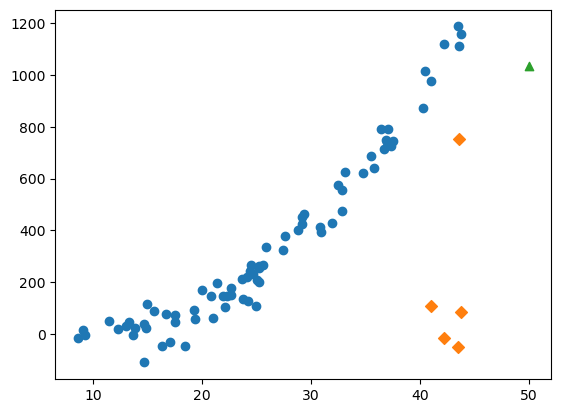

In [46]:
# 50cm 농엉의 이웃 구한다
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],tran_target[indexes],marker='D')
#50cm 농어 데이터
plt.scatter(50,1033,marker='^')
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#선형 회귀 모델 훈련
lr.fit(train_input,train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

[[1167.86557523]]
[[33.9318457]] [-528.72670986]


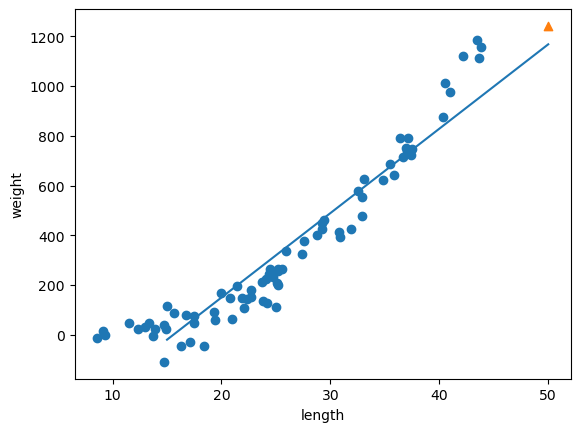

0.9011228307141846
0.8621766699386588


In [49]:
#훈련 세트의 산점도를 그립니다
plt.scatter(train_input,train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
line_x = np.array([15, 50])
line_y = lr.predict(line_x.reshape(-1, 1))   # 입력 데이터는 2차원으로 변환
plt.plot(line_x, line_y)

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련 세트 점수와 테스트 세트 점수 출력
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

In [50]:
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [51]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))

print(lr.coef_,lr.intercept_)

[[1644.7721145]]
[[  1.0207059  -20.06026924]] [96.02083304]
